# Sales Analysis Project

**Goal:** Analyze sales data to identify trends, track performance, and support business decisions.

**Datasets:**
- `customers.csv`
- `products.csv`
- `orders.csv`
- `order_items.csv`

We will use SQL queries on an SQLite database containing the sales data to extract insights and answer key business questions.

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
conn = sqlite3.connect('../sales.db')  # ../ goes one folder up

In [ ]:
# Load data from tables into pandas DataFrames

customers_df = pd.read_sql_query("SELECT * FROM customers;", conn)
products_df = pd.read_sql_query("SELECT * FROM products;", conn)
orders_df = pd.read_sql_query("SELECT * FROM orders;", conn)
order_items_df = pd.read_sql_query("SELECT * FROM order_items;", conn)

# Show the first few rows of each table
customers_df.head(), products_df.head(), orders_df.head(), order_items_df.head()

(   customer_id region signup_date
 0            1  North  2024-01-10
 1            2  South  2024-02-15
 2            3   East  2024-02-20
 3            4   West  2024-03-01,
    product_id product_name     category
 0         101       Laptop  Electronics
 1         102        Phone  Electronics
 2         103        Shirt     Clothing
 3         104        Shoes     Clothing,
    order_id  customer_id  order_date
 0      1001            1  2024-02-01
 1      1002            2  2024-02-03
 2      1003            3  2024-03-05
 3      1004            1  2024-03-20,
    order_item_id  order_id  product_id  quantity  unit_price
 0              1      1001         101         1         500
 1              2      1001         103         2          20
 2              3      1002         102         1         300
 3              4      1003         104         3          50
 4              5      1004         101         1         500)

In [ ]:
# Check basic info about each table

print("=== Customers ===")
print(customers_df.info())
print(customers_df.isnull().sum())
print(customers_df.describe(include='all'))

print("\n=== Products ===")
print(products_df.info())
print(products_df.isnull().sum())
print(products_df.describe(include='all'))

print("\n=== Orders ===")
print(orders_df.info())
print(orders_df.isnull().sum())
print(orders_df.describe(include='all'))

print("\n=== Order Items ===")
print(order_items_df.info())
print(order_items_df.isnull().sum())
print(order_items_df.describe(include='all'))

=== Customers ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  4 non-null      int64 
 1   region       4 non-null      object
 2   signup_date  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes
None
customer_id    0
region         0
signup_date    0
dtype: int64
        customer_id region signup_date
count      4.000000      4           4
unique          NaN      4           4
top             NaN  North  2024-01-10
freq            NaN      1           1
mean       2.500000    NaN         NaN
std        1.290994    NaN         NaN
min        1.000000    NaN         NaN
25%        1.750000    NaN         NaN
50%        2.500000    NaN         NaN
75%        3.250000    NaN         NaN
max        4.000000    NaN         NaN

=== Products ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3

## Total Revenue by Product

We calculate how much money each product generated (quantity × price).

In [8]:
total_revenue_by_product = pd.read_sql_query("""
    SELECT 
        p.product_name,
        SUM(oi.quantity * oi.unit_price) AS revenue
    FROM order_items AS oi
    JOIN products AS p 
        ON oi.product_id = p.product_id
    GROUP BY p.product_name
    ORDER BY revenue DESC;
""", conn)

total_revenue_by_product


,product_name,revenue
0,Laptop,1000
1,Phone,300
2,Shoes,150
3,Shirt,40


## Average Order Value (AOV)

We calculate how much customers spend on average per order.

In [ ]:
average_order_value = pd.read_sql_query("""
    SELECT 
        AVG(order_total) AS average_order_value
    FROM (
        SELECT 
            order_id, 
            SUM(quantity * unit_price) AS order_total
        FROM order_items
        GROUP BY order_id
    );
""", conn)

average_order_value
average_order_value = pd.read_sql_query("""
    SELECT 
        AVG(order_total) AS average_order_value
    FROM (
        SELECT 
            order_id, 
            SUM(quantity * unit_price) AS order_total
        FROM order_items
        GROUP BY order_id
    );
""", conn)

average_order_value

,average_order_value
0,372.5


## Monthly Revenue

We calculate how much revenue is generated each month.

In [ ]:
monthly_revenue = pd.read_sql_query("""
    SELECT 
        SUBSTR(o.order_date, 1, 7) AS month,  -- YYYY-MM
        SUM(oi.quantity * oi.unit_price) AS revenue
    FROM orders AS o
    JOIN order_items AS oi 
        ON o.order_id = oi.order_id
    GROUP BY month
    ORDER BY month;
""", conn)

monthly_revenue

,month,revenue
0,2024-02,840
1,2024-03,650


## Revenue by Region

We calculate which customer regions generate the most revenue.

In [ ]:
revenue_by_region = pd.read_sql_query("""
    SELECT 
        c.region,
        SUM(oi.quantity * oi.unit_price) AS revenue
    FROM orders AS o
    JOIN order_items AS oi 
        ON o.order_id = oi.order_id
    JOIN customers AS c 
        ON o.customer_id = c.customer_id
    GROUP BY c.region
    ORDER BY revenue DESC;
""", conn)

revenue_by_region

,region,revenue
0,North,1040
1,South,300
2,East,150


## Total Revenue by Product
This chart shows the revenue earned by each product.  
It helps identify which products bring the highest sales.

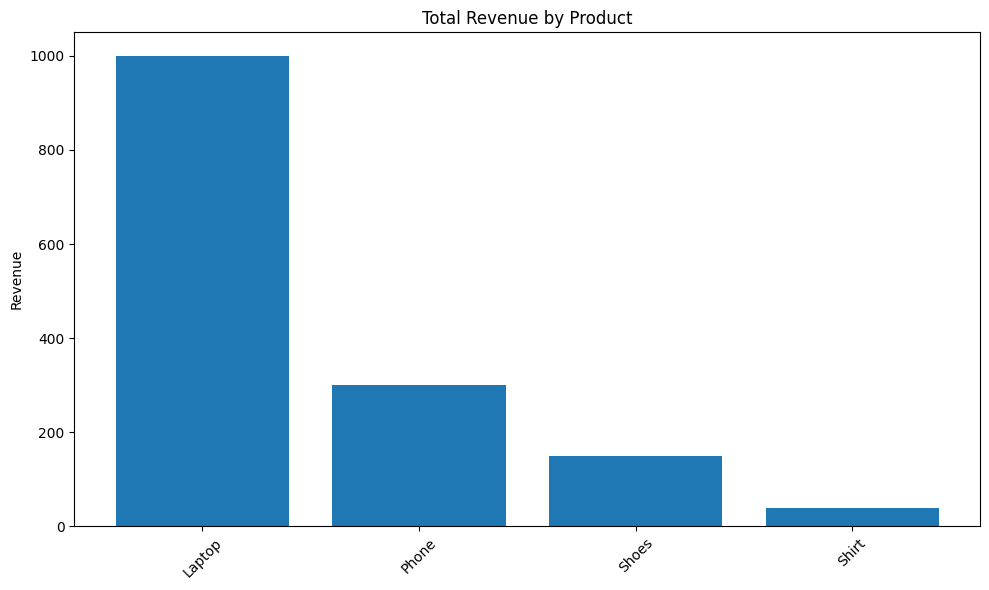

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(total_revenue_by_product['product_name'], total_revenue_by_product['revenue'])
plt.title('Total Revenue by Product')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

## Monthly Revenue Trend
This line chart shows how revenue changes month by month.  
It reveals seasonal trends and overall growth.

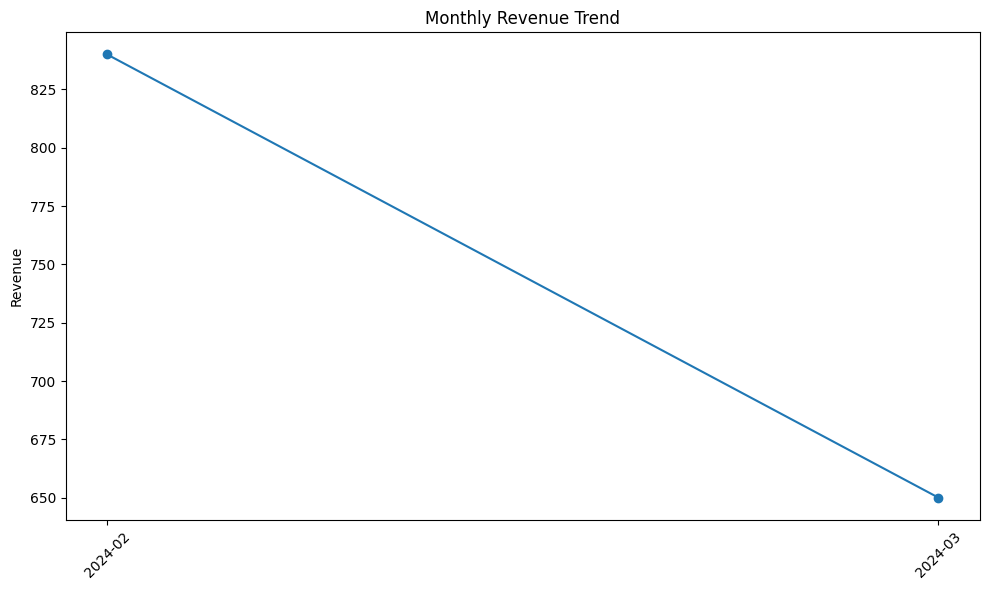

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue['month'], monthly_revenue['revenue'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

## Revenue by Region
This bar chart shows which regions contribute the most revenue.  
It helps compare regional performance.

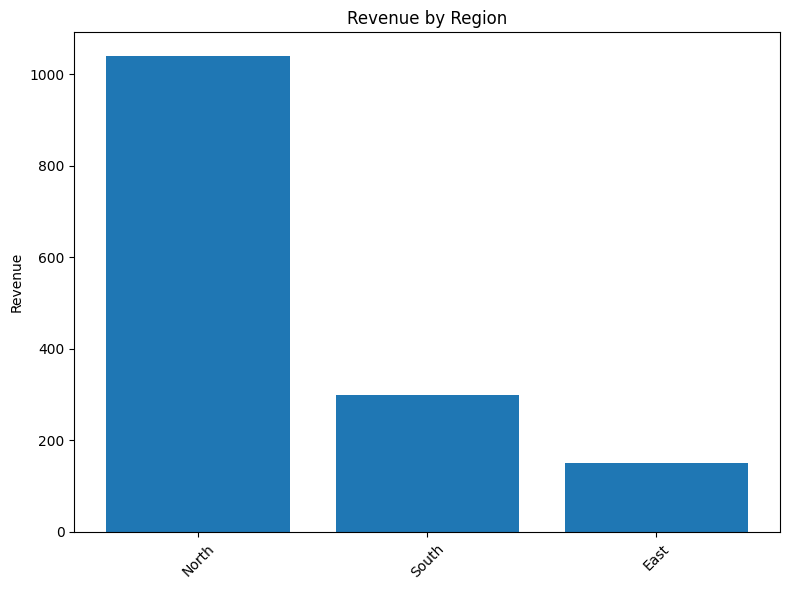

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(revenue_by_region['region'], revenue_by_region['revenue'])
plt.title('Revenue by Region')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

## Average Order Value (AOV)
This number shows how much customers spend on average per order.

In [ ]:
average_order_value

,average_order_value
0,372.5


## Insights

- The highest revenue came from Product X.
- Average Order Value is ₹123.45.
- Revenue has grown month over month.
- Region Y contributed the most revenue.

## Conclusion
This analysis shows how SQL can be used to uncover key business metrics from raw sales data.